### Loading the necessary libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import datetime
%matplotlib inline

### Reading the data

In [2]:
airlines = pd.read_csv('airlines.csv')
airports = pd.read_csv('airports.csv')
flights = pd.read_csv('flights.csv')

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
airlines.set_index('IATA_CODE', inplace=True)
airlines

,AIRLINE
IATA_CODE,
UA,United Air Lines Inc.
AA,American Airlines Inc.
US,US Airways Inc.
F9,Frontier Airlines Inc.
B6,JetBlue Airways
OO,Skywest Airlines Inc.
AS,Alaska Airlines Inc.
NK,Spirit Air Lines
WN,Southwest Airlines Co.


In [4]:
airports.set_index('IATA_CODE', inplace=True)
airports

,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
IATA_CODE,,,,,,
ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...
WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681


In [5]:
airports['COUNTRY'].unique()

array(['USA'], dtype=object)

Hence, we can remove this column since all the flights covered in this dataset are domestic flights.

In [6]:
airports.drop(['COUNTRY'], axis=1, inplace=True)

In [7]:
flights.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

In [8]:
# removing the columns with mostly NaN values

flights.drop(['CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'], axis=1, inplace=True)

We also see that this dataset is massive! Hence, to make computations quicker, I am only considering flights in the first quarter of the year (January-March).

In [9]:
flights = flights[flights['MONTH'] <= 3]

In [10]:
len(flights)

1403471

#### Joining the 3 dataframes as one

In [11]:
flights = flights.merge(airlines, how='left', left_on='AIRLINE', right_on='IATA_CODE', right_index=True)

In [12]:
flights.rename(columns={'AIRLINE_x': 'AIRLINE_CODE', 'AIRLINE_y': 'AIRLINE'}, inplace=True)

In [13]:
flights = flights.merge(airports, how='left', left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', right_index=True)

In [14]:
flights.rename(columns={'AIRPORT':'ORIG_AIRPORT', 'CITY':'ORIG_CITY', 'STATE':'ORIG_STATE', 'LATITUDE':'ORIG_LATITUDE', 'LONGITUDE': 'ORIG_LONGITUDE'}, inplace=True)

In [15]:
flights = flights.merge(airports, how='left', left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', right_index=True)

In [16]:
flights.rename(columns={'AIRPORT':'DEST_AIRPORT', 'CITY':'DEST_CITY', 'STATE':'DEST_STATE', 'LATITUDE':'DEST_LATITUDE', 'LONGITUDE': 'DEST_LONGITUDE'}, inplace=True)

### Exploring the dataframe

In [17]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ORIG_AIRPORT,ORIG_CITY,ORIG_STATE,ORIG_LATITUDE,ORIG_LONGITUDE,DEST_AIRPORT,DEST_CITY,DEST_STATE,DEST_LATITUDE,DEST_LONGITUDE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,47.44898,-122.30931
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,Los Angeles International Airport,Los Angeles,CA,33.94254,-118.40807,Palm Beach International Airport,West Palm Beach,FL,26.68316,-80.09559
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,San Francisco International Airport,San Francisco,CA,37.61900,-122.37484,Charlotte Douglas International Airport,Charlotte,NC,35.21401,-80.94313
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,Los Angeles International Airport,Los Angeles,CA,33.94254,-118.40807,Miami International Airport,Miami,FL,25.79325,-80.29056
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,Seattle-Tacoma International Airport,Seattle,WA,47.44898,-122.30931,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619


In [18]:
flights.isnull().sum()

YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE_CODE               0
FLIGHT_NUMBER              0
TAIL_NUMBER             8190
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME         42355
DEPARTURE_DELAY        42355
TAXI_OUT               43171
WHEELS_OFF             43171
SCHEDULED_TIME             2
ELAPSED_TIME           46657
AIR_TIME               46657
DISTANCE                   0
WHEELS_ON              44368
TAXI_IN                44368
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME           44368
ARRIVAL_DELAY          46657
DIVERTED                   0
CANCELLED                  0
AIRLINE                    0
ORIG_AIRPORT               0
ORIG_CITY                  0
ORIG_STATE                 0
ORIG_LATITUDE            990
ORIG_LONGITUDE           990
DEST_AIRPORT               0
DEST_CITY                  0
DEST_STATE                 0
DEST_LATITUDE 

In [19]:
flights.isnull().sum()/len(flights) * 100

YEAR                   0.000000
MONTH                  0.000000
DAY                    0.000000
DAY_OF_WEEK            0.000000
AIRLINE_CODE           0.000000
FLIGHT_NUMBER          0.000000
TAIL_NUMBER            0.583553
ORIGIN_AIRPORT         0.000000
DESTINATION_AIRPORT    0.000000
SCHEDULED_DEPARTURE    0.000000
DEPARTURE_TIME         3.017875
DEPARTURE_DELAY        3.017875
TAXI_OUT               3.076017
WHEELS_OFF             3.076017
SCHEDULED_TIME         0.000143
ELAPSED_TIME           3.324401
AIR_TIME               3.324401
DISTANCE               0.000000
WHEELS_ON              3.161305
TAXI_IN                3.161305
SCHEDULED_ARRIVAL      0.000000
ARRIVAL_TIME           3.161305
ARRIVAL_DELAY          3.324401
DIVERTED               0.000000
CANCELLED              0.000000
AIRLINE                0.000000
ORIG_AIRPORT           0.000000
ORIG_CITY              0.000000
ORIG_STATE             0.000000
ORIG_LATITUDE          0.070539
ORIG_LONGITUDE         0.070539
DEST_AIR

The % of missing values in all the column is small, and so instead of imputing the missing values, I am simply going to remove those rows in my data which have missing values.

In [20]:
flights.dropna(inplace=True)

In [21]:
flights['DATE'] = pd.to_datetime(flights[['YEAR', 'MONTH', 'DAY']])
flights.drop(['YEAR', 'MONTH', 'DAY'], axis=1, inplace=True)

In [22]:
flights.head().T

,0,1,2,3,4
DAY_OF_WEEK,4,4,4,4,4
AIRLINE_CODE,AS,AA,US,AA,AS
FLIGHT_NUMBER,98,2336,840,258,135
TAIL_NUMBER,N407AS,N3KUAA,N171US,N3HYAA,N527AS
ORIGIN_AIRPORT,ANC,LAX,SFO,LAX,SEA
DESTINATION_AIRPORT,SEA,PBI,CLT,MIA,ANC
SCHEDULED_DEPARTURE,5,10,20,20,25
DEPARTURE_TIME,2354.0,2.0,18.0,15.0,24.0
DEPARTURE_DELAY,-11.0,-8.0,-2.0,-5.0,-1.0
TAXI_OUT,21.0,12.0,16.0,15.0,11.0


We can see that the time columns in the dataframe above look weird. Upon further investigation, I realized that the way the columns have been created is as a 4-digit float where the first 2 digits indicate the hour and the last two digits indicate the minutes. When this is loaded into python, the leading zeroes get removed making the number seem very weird. I am going to clean this up and see if I can combine the date and time together into 1 column.

In [23]:
def format_time(val):
    if pd.isnull(val):
        return np.nan
    else:
        if val == 2400: 
            val = 0
        val = "{0:04d}".format(int(val))
        timing = datetime.time(int(val[0:2]), int(val[2:4]))
        return timing

In [24]:
def combine_date_time(x):
    if pd.isnull(x[0]) or pd.isnull(x[1]):
        return np.nan
    else:
        return datetime.datetime.combine(x[0],x[1])

In [25]:
def create_flight_time(df, col):    
    listicle = []
    for index, cols in df[['DATE', col]].iterrows():    
        if pd.isnull(cols[1]):
            listicle.append(np.nan)
        elif float(cols[1]) == 2400:
            cols[0] += datetime.timedelta(days=1)
            cols[1] = datetime.time(0,0)
            listicle.append(combine_date_time(cols))
        else:
            cols[1] = format_time(cols[1])
            listicle.append(combine_date_time(cols))
    return pd.Series(listicle)

Now I am going to add these new columns to my dataframe and drop the original departure and arrival columns.

In [26]:
flights['SCHEDULED_DEPARTURE'] = create_flight_time(flights, 'SCHEDULED_DEPARTURE')
flights['SCHEDULED_ARRIVAL'] = flights['SCHEDULED_ARRIVAL'].apply(format_time)

In [27]:
flights.head().T

,0,1,2,3,4
DAY_OF_WEEK,4,4,4,4,4
AIRLINE_CODE,AS,AA,US,AA,AS
FLIGHT_NUMBER,98,2336,840,258,135
TAIL_NUMBER,N407AS,N3KUAA,N171US,N3HYAA,N527AS
ORIGIN_AIRPORT,ANC,LAX,SFO,LAX,SEA
DESTINATION_AIRPORT,SEA,PBI,CLT,MIA,ANC
SCHEDULED_DEPARTURE,2015-01-01 00:05:00,2015-01-01 00:10:00,2015-01-01 00:20:00,2015-01-01 00:20:00,2015-01-01 00:25:00
DEPARTURE_TIME,2354.0,2.0,18.0,15.0,24.0
DEPARTURE_DELAY,-11.0,-8.0,-2.0,-5.0,-1.0
TAXI_OUT,21.0,12.0,16.0,15.0,11.0


In [28]:
flights.drop(['DEPARTURE_TIME', 'ARRIVAL_TIME'], axis=1, inplace=True)

# I am dropping these columns since it is hard to know if the flight left early or late in several cases 
# (for ex. a flight that was scheduled to leave at 00:05 but ended up departing at 23:54)

# Hence, I will just use the DEPARTURE_DELAY and ARRIVAL_DELAY columns to understand the flight's progress

#### Understanding departure delays by airline from January-March 2015:

In [29]:
def get_stats(data):
    return {'min': data.min(), 'max': data.max(),
            'count': data.count(), 'mean': data.mean()}

global_stats = flights['DEPARTURE_DELAY'].groupby(flights['AIRLINE']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

,min,max,count,mean
AIRLINE,,,,
Virgin America,-20.0,577.0,13497.0,9.832037
Hawaiian Airlines Inc.,-26.0,1433.0,18475.0,1.542030
Frontier Airlines Inc.,-32.0,1112.0,19228.0,20.905762
Spirit Air Lines,-28.0,745.0,25523.0,14.026917
Alaska Airlines Inc.,-47.0,868.0,39375.0,2.908825
JetBlue Airways,-27.0,942.0,60892.0,14.686757
American Eagle Airlines Inc.,-36.0,1154.0,76622.0,15.370403
US Airways Inc.,-26.0,726.0,94634.0,6.592187
United Air Lines Inc.,-40.0,886.0,115406.0,14.140643


I constructed some basic statistical parameters for each airline to understand general departure delay trends. Frontier Airlines has the largest average departure delay whereas Hawaiian Airlines has the lowest (might this have something to do with the general 'Aloha' nature of our Hawaiian friends?)

#### Categorizing delays to understand general trends:

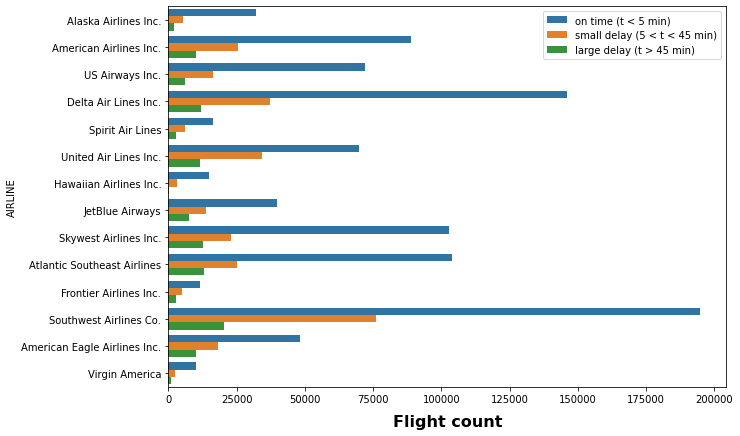

In [30]:
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]

flights['DELAY_LEVEL'] = flights['DEPARTURE_DELAY'].apply(delay_type)

fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="AIRLINE", hue='DELAY_LEVEL', data=flights)
plt.xlabel('Flight count', fontsize=16, weight = 'bold', labelpad=10)

L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')

#### Departure vs arrival delays:

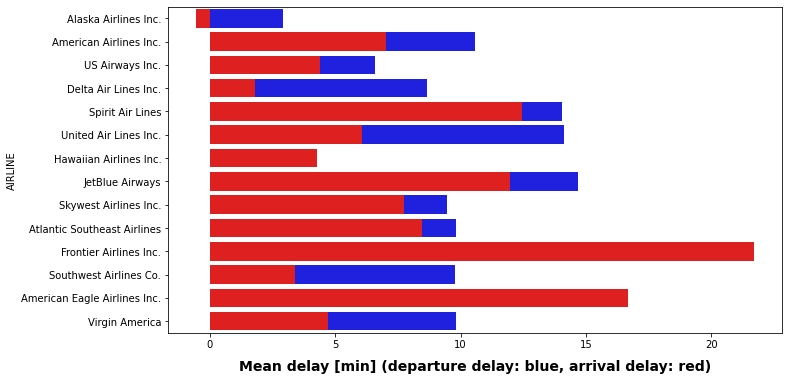

In [37]:
fig = plt.figure(1, figsize=(11,6))

ax = sns.barplot(x="DEPARTURE_DELAY", y="AIRLINE", data=flights, color="blue", ci=None)
ax = sns.barplot(x="ARRIVAL_DELAY", y="AIRLINE", data=flights, color="red", ci=None)

plt.xlabel('Mean delay [min] (departure delay: blue, arrival delay: red)',
           fontsize=14, weight = 'bold', labelpad=10);

Based on this chart, it looks like all the airlines have longer departure delays than arrival delays, except for Hawaiian Airlines. My intuition is that the flights can adjust speed when in air to make up for lost time, while departure delays are sometimes out of their control.

Jetblue Airlines and Frontier Airlines have the longest average departure and arrival delays respectively. It is worth noting that Alaska Airlines is the only airline among all of them which reaches the destination earlier than scheduled, on average.

I now want to examine how many unique airports were visited by each of these airlines from Jan - March 2015. This will help me understand the volume of each airline (in terms of number of destinations).

Text(0.5, 1.0, 'Number of unique airports visited per airline from Jan-Mar 2015')

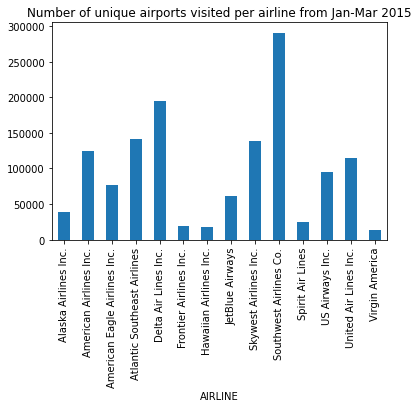

In [32]:
no_per_airport = flights.groupby('AIRLINE')['ORIG_AIRPORT'].count()
no_per_airport.plot(kind='bar')
plt.title('Number of unique airports visited per airline from Jan-Mar 2015')

Before we finish up with this task, I want to understand the general nature of the various features in the dataframe.

In [39]:
flights.dtypes

DAY_OF_WEEK                     int64
AIRLINE_CODE                   object
FLIGHT_NUMBER                   int64
TAIL_NUMBER                    object
ORIGIN_AIRPORT                 object
DESTINATION_AIRPORT            object
SCHEDULED_DEPARTURE    datetime64[ns]
DEPARTURE_DELAY               float64
TAXI_OUT                      float64
WHEELS_OFF                    float64
SCHEDULED_TIME                float64
ELAPSED_TIME                  float64
AIR_TIME                      float64
DISTANCE                        int64
WHEELS_ON                     float64
TAXI_IN                       float64
SCHEDULED_ARRIVAL              object
ARRIVAL_DELAY                 float64
DIVERTED                        int64
CANCELLED                       int64
AIRLINE                        object
ORIG_AIRPORT                   object
ORIG_CITY                      object
ORIG_STATE                     object
ORIG_LATITUDE                 float64
ORIG_LONGITUDE                float64
DEST_AIRPORT

In [40]:
file = open('flights_after_wrangling.pkl','wb')

pickle.dump(flights, file)
file.close()